In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# imports for classifiers and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


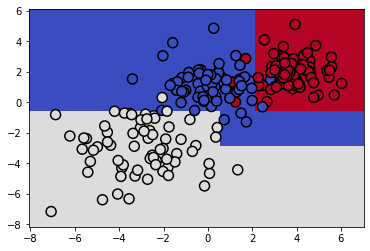

In [ ]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

In [ ]:
data = pd.read_csv('/work/data/bill_authentication.csv', sep =',')

NameError: name 'pd' is not defined

In [ ]:
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
clf_tree = DecisionTreeClassifier(random_state=17, max_depth=3, max_features=2)

In [ ]:
clf_tree.fit(X_train, y_train)
clf_tree_pred = clf_tree.predict(X_test)

In [ ]:
clf_tree.score(X_test, y_test)

0.88

In [ ]:
# Decision Tree Classifier

# instantiate
dtc = DecisionTreeClassifier(random_state=17, max_depth=3, max_features=2)

# fit
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test)

# print - можно изменить количество после запятой
print ("Decision Tree F1 score: {:.3f}".format(score))

Decision Tree F1 score: 0.866


In [ ]:
dtc.predict([[2.04378,-0.38422,1.437292,0.76421]])

array([0])

In [ ]:
petrol_data = pd.read_csv('/work/data/petrol_consumption.csv', sep =',')

In [ ]:
petrol_data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [ ]:
X = petrol_data.drop(['Petrol_Consumption'], axis=1)
y = petrol_data['Petrol_Consumption']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
# fit
reg_tree.fit(X_train, y_train)

# predict
y_pred = reg_tree.predict(X_test)

# rmse score
score = (mean_squared_error(y_pred, y_test, squared=False))

# print - можно изменить количество после запятой
print ("Decision Tree Regressor RMSE score: {:.4f}".format(score))

Decision Tree Regressor RMSE score: 87.9651


In [ ]:
reg_tree.get_depth()

11

Задание 5.5.1
Пусть у нас есть выборка [A,B,C,D,E,F]. Мы хотим использовать бэггинг для обучения моделей на этой выборке. Какие бутстрэп-выборки могли получиться из нее?

In [ ]:
winequality_data = pd.read_csv('/work/data/winequality-red.csv', sep='[;]', quotechar="", quoting=1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
winequality_data

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,"""7.4",0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,"5"""
1,"""7.8",0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,"5"""
2,"""7.8",0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,"5"""
3,"""11.2",0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,"6"""
4,"""7.4",0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,"5"""
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,"""6.2",0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,"5"""
1595,"""5.9",0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,"6"""
1596,"""6.3",0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,"6"""
1597,"""5.9",0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,"5"""


In [ ]:
winequality_data.replace(regex=True,inplace=True,to_replace=r'"',value=r'')

In [ ]:
winequality_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
winequality_data.columns=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality']

In [ ]:
winequality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
winequality_data = winequality_data.astype(float)

In [ ]:
winequality_data['quality'] = np.where(winequality_data['quality'] >= 6, 1, 0)

In [ ]:
winequality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
X = winequality_data.drop(['quality'], axis=1)
y = winequality_data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree Classifier

# instantiate
dtc = DecisionTreeClassifier(random_state=42, max_depth=10)

# fit
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test)

# print - можно изменить количество после запятой
print ("Decision Tree F1 score: {:.3f}".format(score))

Decision Tree F1 score: 0.793


In [ ]:
# instantiate
log_reg = LogisticRegression(random_state=42)

# fit
log_reg.fit(X_train, y_train)

# predict
y_pred = log_reg.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test)

print ("Logistic Regression F1 score: {:.3f}".format(score))

Logistic Regression F1 score: 0.753
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
base_cls = DecisionTreeClassifier(random_state=42, max_depth=10) 
  
# no. of base classifier 
num_trees = 1500
  
# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = 42) 


# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test)

print ("DecisionTreeClassifier with BaggingClassifier F1 score: {:.3f}".format(score))

# results = model_selection.cross_val_score(model, X, Y, cv = kfold) 
# print("accuracy :") 
# print(results.mean()) 

DecisionTreeClassifier with BaggingClassifier F1 score: 0.818


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=762381e0-0fb5-4cfa-9159-464420420d1d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>